In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [62]:
df= pd.read_csv('dataset/Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [63]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [64]:
df= df.drop('Unnamed: 0', axis=1)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [75]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [76]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


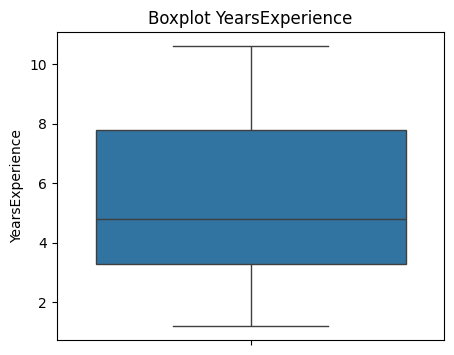

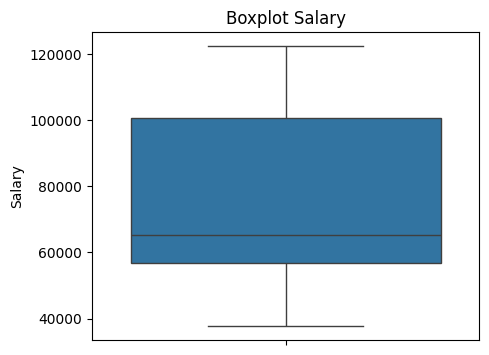

In [65]:
for col in df:
    plt.figure(figsize=(5,4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot {col}")
    plt.ylabel(col)
    plt.show()

In [66]:
cols = ['YearsExperience', 'Salary']

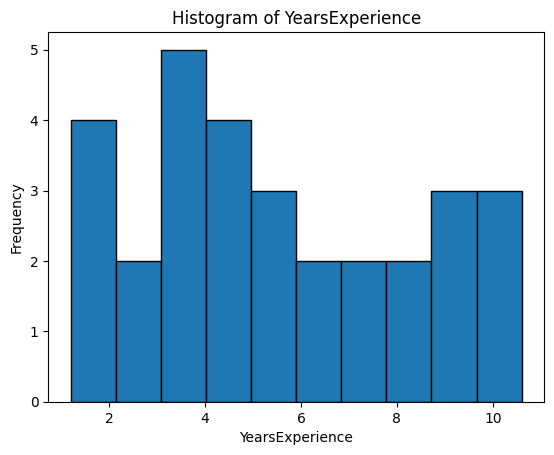

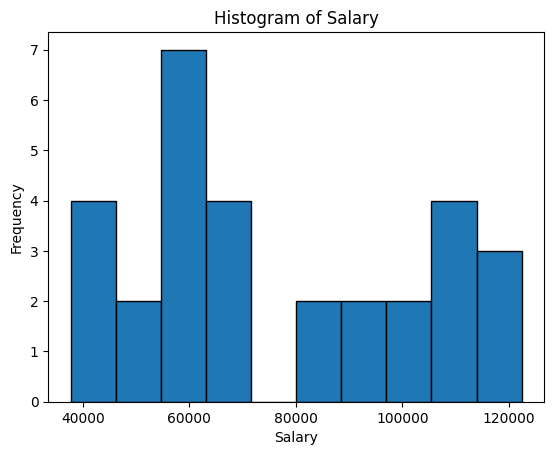

In [67]:
for col in cols:
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [68]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


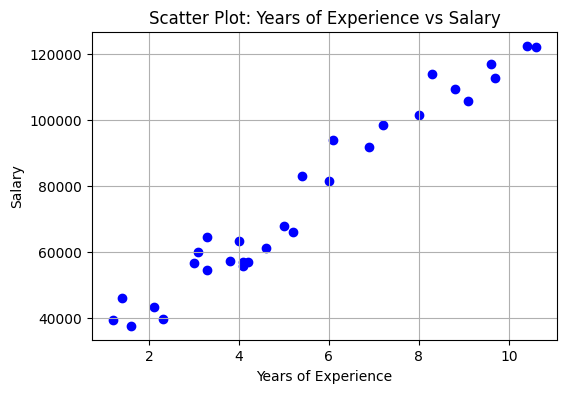

In [69]:
plt.figure(figsize=(6, 4))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('Scatter Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

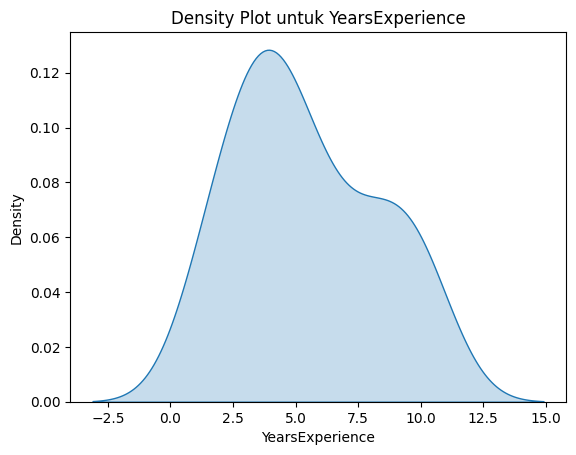

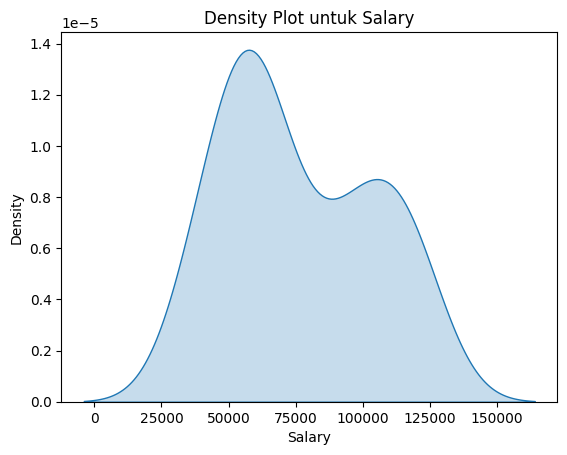

In [70]:
for col in cols:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot untuk {col}')
    plt.show()

In [71]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

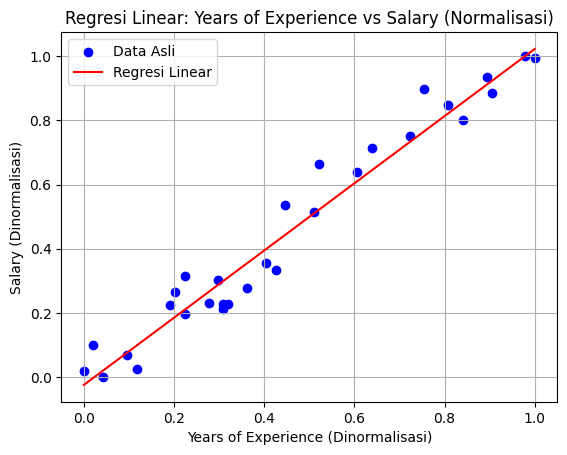

Mean Squared Error (MSE) pada data uji: 0.006952407238200631
Root Mean Squared Error (RMSE) pada data uji: 0.08338109640800265
Mean Absolute Error (MAE) pada data uji: 0.07425530156812828
R-squared (R2) pada data uji: 0.9024461774180499
Koefisien (slope): 1.0463485003129125
Intercept: -0.02413442160275353


In [72]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi menggunakan Min-Max Scaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

# Memisahkan fitur dan target
X = df_normalized[['YearsExperience']].values  # Fitur
y = df_normalized['Salary'].values  # Target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model_linear = LinearRegression()

# Melatih model
model_linear.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

# Visualisasi hasil regresi linear pada seluruh dataset
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_linear.predict(X), color='red', label='Regresi Linear')
plt.title('Regresi Linear: Years of Experience vs Salary (Normalisasi)')
plt.xlabel('Years of Experience (Dinormalisasi)')
plt.ylabel('Salary (Dinormalisasi)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = np.sqrt(mse)   # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)   # R-squared

# Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)

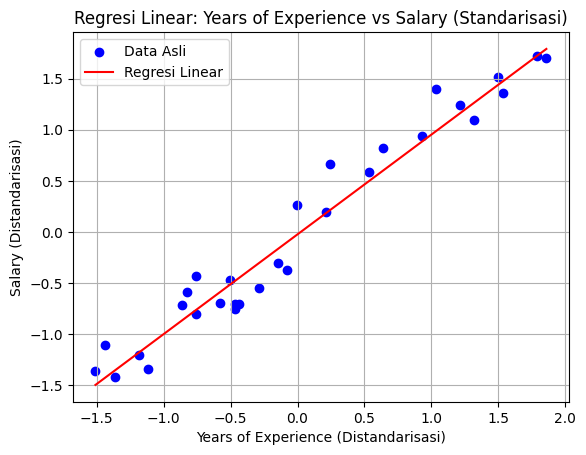

Mean Squared Error (MSE) pada data uji: 0.06858932896507032
Root Mean Squared Error (RMSE) pada data uji: 0.26189564518156905
Mean Absolute Error (MAE) pada data uji: 0.23323200281725331
R-squared (R2) pada data uji: 0.9024461774180499
Koefisien (slope): 0.9755349323468544
Intercept: -0.022614558679782598


In [73]:
from sklearn.preprocessing import StandardScaler

# Standarisasi menggunakan StandardScaler
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

# Memisahkan fitur dan target
X = df_standardized[['YearsExperience']].values  # Fitur
y = df_standardized['Salary'].values  # Target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model_linear = LinearRegression()

# Melatih model
model_linear.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

# Visualisasi hasil regresi linear pada seluruh dataset
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_linear.predict(X), color='red', label='Regresi Linear')
plt.title('Regresi Linear: Years of Experience vs Salary (Standarisasi)')
plt.xlabel('Years of Experience (Distandarisasi)')
plt.ylabel('Salary (Distandarisasi)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = np.sqrt(mse)   # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)   # R-squared

# Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)

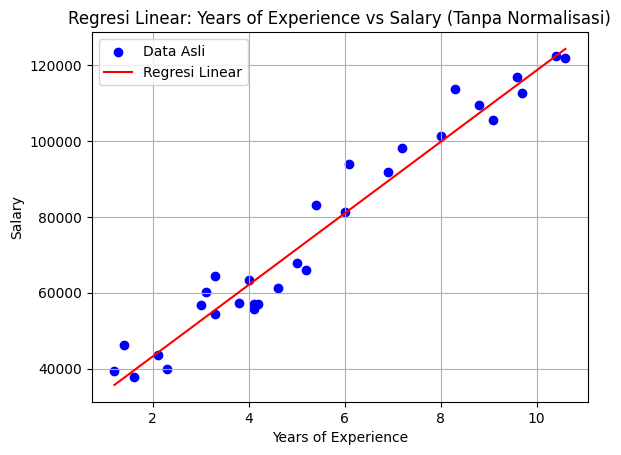

Mean Squared Error (MSE) pada data uji: 49830096.855908334
Root Mean Squared Error (RMSE) pada data uji: 7059.043621901506
Mean Absolute Error (MAE) pada data uji: 6286.453830757745
R-squared (R2) pada data uji: 0.9024461774180498
Koefisien (slope): 9423.81532303098
Intercept: 24380.20147947369


In [74]:
# Memisahkan fitur dan target (tanpa normalisasi)
X = df[['YearsExperience']].values  # Fitur
y = df['Salary'].values             # Target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Membuat model regresi linear
model_linear = LinearRegression()

# Melatih model
model_linear.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

# Visualisasi hasil regresi linear pada seluruh dataset
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_linear.predict(X), color='red', label='Regresi Linear')
plt.title('Regresi Linear: Years of Experience vs Salary (Tanpa Normalisasi)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)   # Mean Squared Error
rmse = np.sqrt(mse)                              # Root Mean Squared Error
mae  = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2   = r2_score(y_test, y_pred_test)             # R-squared

# Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)